In [1]:
"""
------------------------------------------------------------------------------
About
In this data analysis, the number of trees (Anlagen + Strassen) is calculated 
for each admin area. 
------------------------------------------------------------------------------
"""

'\n------------------------------------------------------------------------------\nAbout\nIn this data analysis, the number of trees (Anlagen + Strassen) is calculated \nfor each admin area. \n------------------------------------------------------------------------------\n'

In [2]:
"""
------------------------------------------------------------------------------
Libraries
------------------------------------------------------------------------------
"""

import pandas as pd
import geopandas as gpd

from shapely.geometry import MultiPolygon
from shapely.geometry import MultiPoint
from shapely.ops import unary_union

import matplotlib.pyplot as plt



In [3]:
"""
------------------------------------------------------------------------------
Load GeoJson files
------------------------------------------------------------------------------
"""

admin_areas = gpd.read_file("../data/raw/Prognoseräume.json")

baeume_anlagen = gpd.read_file("../data/raw/Baumbestand_Berlin_-_Anlagenbäume_-_Sachdaten_zur_Karte.json") #trees in Berlin, especially those in parks and public areas

baeume_strassen = gpd.read_file("../data/raw/Baumbestand_Berlin_-_Straßenbäume_-_Sachdaten_zur_Karte.json") #trees in Berlin, especially along the streets

<Axes: >

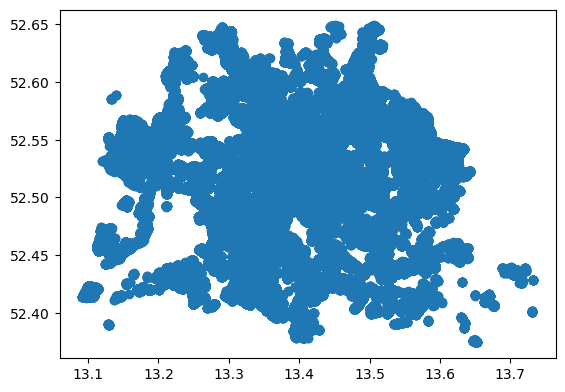

In [4]:
baeume_anlagen.plot()

<Axes: >

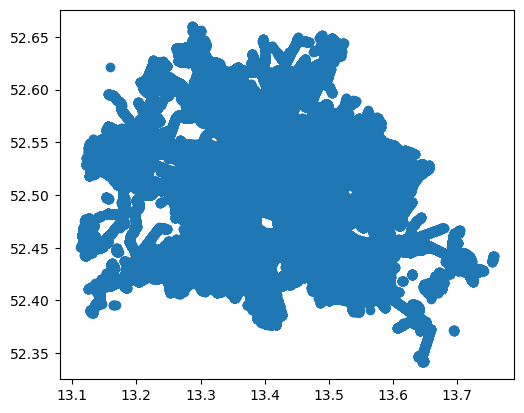

In [5]:
baeume_strassen.plot()

In [6]:
"""
------------------------------------------------------------------------------
Merge tree dataframes
------------------------------------------------------------------------------
"""

baeume_anlagen["Lage"] = "Anlagen"
baeume_anlagen.head()

,id,baumid,standortnr,kennzeich,namenr,art_dtsch,art_bot,gattung_deutsch,gattung,art_gruppe,pflanzjahr,standalter,kronedurch,stammumfg,baumhoehe,bezirk,eigentuemer,geometry,Lage
0,00008100:000be4d0,00008100:000be4d0,066,411.232,Weigandufer,Eingriffliger Weissdorn,Crataegus monogyna,WEIßDORN,CRATAEGUS,Laubbäume,1989,35.0,,60,,Neukölln,Land Berlin,POINT (13.44825 52.48155),Anlagen
1,00008100:000be4d2,00008100:000be4d2,059,411.232,Weigandufer,Hahnensporn-Weissdorn,Crataegus crus-galli,WEIßDORN,CRATAEGUS,Laubbäume,1994,30.0,,37,,Neukölln,Land Berlin,POINT (13.4488 52.48197),Anlagen
2,00008100:000be4f2,00008100:000be4f2,062,411.232,Weigandufer,Pflaumenblättriger Weiss-Dorn,Crataegus prunifolia,WEIßDORN,CRATAEGUS,Laubbäume,1987,37.0,,65,,Neukölln,Land Berlin,POINT (13.44856 52.48178),Anlagen
3,00008100:000bf296,00008100:000bf296,14,221.068,Roetepfuhl-Grünanlage,Gemeine Rosskastanie,Aesculus hippocastanum,ROSSKASTANIE,AESCULUS,Laubbäume,1985,39.0,,128,,Neukölln,Land Berlin,POINT (13.42874 52.44159),Anlagen
4,00008100:000bf297,00008100:000bf297,13,221.068,Roetepfuhl-Grünanlage,Gemeine Rosskastanie,Aesculus hippocastanum,ROSSKASTANIE,AESCULUS,Laubbäume,1985,39.0,,112,,Neukölln,Land Berlin,POINT (13.42881 52.44165),Anlagen


In [7]:

baeume_strassen["Lage"] = "Strasse"
baeume_strassen.head()


,id,baumid,standortnr,kennzeich,namenr,art_dtsch,art_bot,gattung_deutsch,gattung,art_gruppe,...,zusatz,pflanzjahr,standalter,kronedurch,stammumfg,baumhoehe,bezirk,eigentuemer,geometry,Lage
0,00008100:000bbafb,00008100:000bbafb,93,01414,Fritz-Reuter-Allee,Pyramiden-Hainbuche,Carpinus betulus 'Fastigiata',HAINBUCHE,CARPINUS,Laubbäume,...,,1975,49.0,,109,15.0,Neukölln,Land Berlin,POINT (13.44828 52.44315),Strasse
1,00008100:000bbafd,00008100:000bbafd,91,01414,Fritz-Reuter-Allee,"Berg-Ahorn, Weiss-Ahorn",Acer pseudoplatanus,AHORN,ACER,Laubbäume,...,,1975,49.0,,382,,Neukölln,Land Berlin,POINT (13.44842 52.44326),Strasse
2,00008100:000bbafe,00008100:000bbafe,90,01414,Fritz-Reuter-Allee,"Berg-Ahorn, Weiss-Ahorn",Acer pseudoplatanus,AHORN,ACER,Laubbäume,...,,1980,44.0,,98,14.0,Neukölln,Land Berlin,POINT (13.44851 52.44332),Strasse
3,00008100:000bbaff,00008100:000bbaff,89,01414,Fritz-Reuter-Allee,"Berg-Ahorn, Weiss-Ahorn",Acer pseudoplatanus,AHORN,ACER,Laubbäume,...,,1935,89.0,,189,15.0,Neukölln,Land Berlin,POINT (13.44863 52.44347),Strasse
4,00008100:000bbb00,00008100:000bbb00,88,01414,Fritz-Reuter-Allee,"Berg-Ahorn, Weiss-Ahorn",Acer pseudoplatanus,AHORN,ACER,Laubbäume,...,,1975,49.0,,145,15.0,Neukölln,Land Berlin,POINT (13.44882 52.44365),Strasse


In [8]:
admin_areas.head()

,id,pgr_id,pgr_name,bez,finhalt,stand,geometry
0,c_lor_pgr_2021.0370,0370,Südlicher Prenzlauer Berg,03 - Pankow,3.031117e+06,01.01.2021,"MULTIPOLYGON (((13.41975 52.52555, 13.42016 52..."
1,c_lor_pgr_2021.0220,0220,Kreuzberg Süd,02 - Friedrichshain-Kreuzberg,4.746309e+06,01.01.2021,"MULTIPOLYGON (((13.40772 52.48875, 13.40789 52..."
2,c_lor_pgr_2021.0760,0760,Marienfelde / Lichtenrade,07 - Tempelhof-Schöneberg,1.919254e+07,01.01.2021,"MULTIPOLYGON (((13.35912 52.4199, 13.35902 52...."
3,c_lor_pgr_2021.0520,0520,Wilhelmstadt / Staaken,05 - Spandau,2.301526e+07,01.01.2021,"MULTIPOLYGON (((13.15724 52.50162, 13.15726 52..."
4,c_lor_pgr_2021.0330,0330,Nördliches Weißensee,03 - Pankow,2.222540e+07,01.12.2021,"MULTIPOLYGON (((13.43357 52.58232, 13.43362 52..."


In [9]:
admin_areas.shape

(58, 7)

In [10]:
#merged tree dataframe
df_Trees = pd.concat([baeume_anlagen, baeume_strassen], ignore_index=True)

In [11]:
"""
------------------------------------------------------------------------------
Checking invalid geometries
------------------------------------------------------------------------------
"""

#Check the combined dataframe for empty or invalid geometries
print(f"Empty geometry in df_Trees: {len(df_Trees[df_Trees.is_empty])}")
print(f"Invalid geometry in df_Trees: {len(df_Trees[~df_Trees.is_valid])}")


Empty geometry in df_Trees: 0
Invalid geometry in df_Trees: 0


In [12]:
"""
------------------------------------------------------------------------------
Data exploration
------------------------------------------------------------------------------
"""

df_Trees.shape

(885825, 22)

In [13]:
#Check datatypes and NAs

df_Trees.dtypes

id                   object
baumid               object
standortnr           object
kennzeich            object
namenr               object
art_dtsch            object
art_bot              object
gattung_deutsch      object
gattung              object
art_gruppe           object
pflanzjahr           object
standalter           object
kronedurch           object
stammumfg            object
baumhoehe            object
bezirk               object
eigentuemer          object
geometry           geometry
Lage                 object
strname              object
hausnr               object
zusatz               object
dtype: object

In [14]:
df_Trees.isna().sum()

id                      0
baumid                  0
standortnr              0
kennzeich               0
namenr                  0
art_dtsch               0
art_bot                 0
gattung_deutsch         0
gattung                 0
art_gruppe              0
pflanzjahr              0
standalter              0
kronedurch              0
stammumfg               0
baumhoehe               0
bezirk                  0
eigentuemer             0
geometry                0
Lage                    0
strname            456533
hausnr             456533
zusatz             456533
dtype: int64

In [15]:
#errors="coerce": Converts non-numeric values (strings or invalid entries) to NaN instead of triggering an error
df_Trees["standalter"] = pd.to_numeric(df_Trees["standalter"], errors="coerce")

In [16]:
df_Trees["standalter"] = df_Trees["standalter"].fillna(0)

In [17]:
"""
------------------------------------------------------------------------------
CSR (coordinate reference system)
For GeoJSON files, it is important to know that GeoJSON uses the 
WGS84 (EPSG:4326) CRS by default.
------------------------------------------------------------------------------
"""

#Check CRS
print(admin_areas.crs)
print(df_Trees.crs)


EPSG:4326
EPSG:4326


In [18]:
#Ensure both GeoDataFrames have the same CRS 
if admin_areas.crs != df_Trees.crs:
    df_Trees = df_Trees.to_crs(admin_areas.crs)



<Axes: >

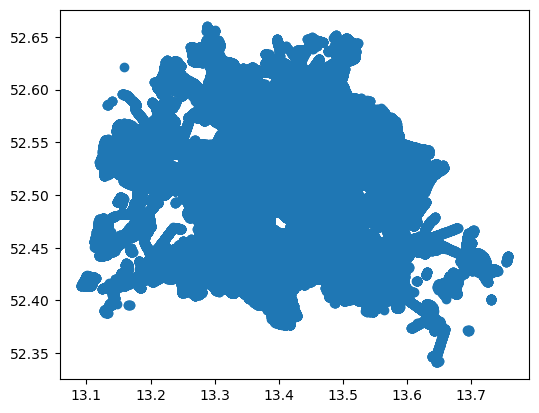

In [19]:
df_Trees.plot()

In [20]:
df_Trees.geometry.head()

0    POINT (13.44825 52.48155)
1     POINT (13.4488 52.48197)
2    POINT (13.44856 52.48178)
3    POINT (13.42874 52.44159)
4    POINT (13.42881 52.44165)
Name: geometry, dtype: geometry

In [21]:

"""
------------------------------------------------------------------------------
Functions
Number of trees, number of tree species, avg age of trees
------------------------------------------------------------------------------
"""


def calculate_tree_number(admin_area, df_Trees):
    #find intersections between the tree dataframe and admin areas
    intersections_trees = df_Trees[df_Trees.intersects(admin_area.geometry)]
    
    #Count the number of trees in the intersecting area and add to tree_count
    tree_count = 0
    for _, row in intersections_trees.iterrows():
        tree_count += 1  
    
    print(f"Admin Area: {admin_area["pgr_name"]}, Tree Count: {tree_count}")
    
    return tree_count



def calculate_tree_species(admin_area, df_Trees):
    #find intersections between the tree dataframe and admin areas
    intersections_trees = df_Trees[df_Trees.intersects(admin_area.geometry)]
    
    #Count the unique tree species in the column "gattung_deutsch"
    unique_tree_species = intersections_trees["gattung_deutsch"].nunique()
    
    print(f"Admin Area: {admin_area["pgr_name"]}, Unique Tree Species: {unique_tree_species}")
    
    return unique_tree_species



def calculate_tree_avgAge(admin_area, df_Trees):
    #find intersections between the tree dataframe and admin areas
    intersections_trees = df_Trees[df_Trees.intersects(admin_area.geometry)]
    
    #average age
    if "standalter" in intersections_trees.columns: 
        avg_tree_age = intersections_trees["standalter"].mean()
    else:
        avg_tree_age = None 

    print(f"Admin Area: {admin_area["pgr_name"]}, avg_tree_age: {avg_tree_age}") 
    
    return avg_tree_age
 

In [22]:
df_Trees.geometry.head()

0    POINT (13.44825 52.48155)
1     POINT (13.4488 52.48197)
2    POINT (13.44856 52.48178)
3    POINT (13.42874 52.44159)
4    POINT (13.42881 52.44165)
Name: geometry, dtype: geometry

In [23]:
#example intersection geojson
intersections_trees_1= df_Trees[df_Trees.intersects(admin_areas.iloc[0].geometry)]
intersections_trees_1 = intersections_trees_1.to_crs(epsg=4326)

multipoint_geometry = MultiPoint(intersections_trees_1.geometry.tolist())

#gdf
gdf_combined = gpd.GeoDataFrame(geometry=[multipoint_geometry], crs=admin_areas.crs)

#gdf_combined.to_file("intersections_trees_adminArea1.geojson")



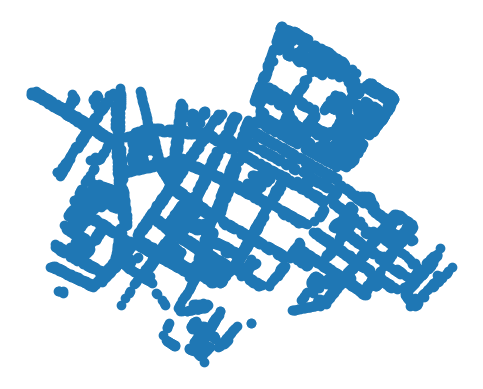

In [24]:
#Transform into svg
fig, ax = plt.subplots()
intersections_trees_1.plot(ax=ax)
ax.set_axis_off()

#fig.savefig("intersections_trees_1.svg", format="svg")

In [25]:
#TEST
baumanzahl = calculate_tree_number(admin_areas.iloc[0], df_Trees)

baumartenanzahl = calculate_tree_species(admin_areas.iloc[0], df_Trees)
durchschnittliches_baumalter = calculate_tree_avgAge(admin_areas.iloc[0], df_Trees)

print(f"Anzahl der Bäume: {baumanzahl}")
print(f"Anzahl der Baumarten: {baumartenanzahl}")
print(f"Durchschnittliches Baumalter: {durchschnittliches_baumalter}")

Admin Area: Südlicher Prenzlauer Berg, Tree Count: 6505
Admin Area: Südlicher Prenzlauer Berg, Unique Tree Species: 52
Admin Area: Südlicher Prenzlauer Berg, avg_tree_age: 29.60922367409685
Anzahl der Bäume: 6505
Anzahl der Baumarten: 52
Durchschnittliches Baumalter: 29.60922367409685


In [26]:
#Calculation of tree_count for each administrative area
admin_areas["tree_count"] = admin_areas.apply(
    lambda row: calculate_tree_number(row, df_Trees), axis=1
)

#Data frame
df_tree_count = admin_areas[["pgr_id", "pgr_name", "tree_count"]]
#sort descending
df_tree_count.sort_values(by="tree_count", ascending=False, inplace=True)

df_tree_count.head()

Admin Area: Südlicher Prenzlauer Berg, Tree Count: 6505
Admin Area: Kreuzberg Süd, Tree Count: 8345
Admin Area: Marienfelde / Lichtenrade, Tree Count: 17425
Admin Area: Wilhelmstadt / Staaken, Tree Count: 17107
Admin Area: Nördliches Weißensee, Tree Count: 18185
Admin Area: Tempelhof, Tree Count: 13698
Admin Area: Lichtenberg Nord, Tree Count: 26337
Admin Area: Lichtenberg Mitte, Tree Count: 12588
Admin Area: Hellersdorf, Tree Count: 22488
Admin Area: Buch, Tree Count: 9079
Admin Area: Hohenschönhausen Nord, Tree Count: 18510
Admin Area: Kaulsdorf/Mahlsdorf, Tree Count: 17417
Admin Area: Treptow-Köpenick 1, Tree Count: 20522
Admin Area: Tegel, Tree Count: 9359
Admin Area: Mariendorf, Tree Count: 11764
Admin Area: Friedrichshain Ost, Tree Count: 8005
Admin Area: Nördlicher Prenzlauer Berg, Tree Count: 17557
Admin Area: Charlottenburg Nord, Tree Count: 4025
Admin Area: Lankwitz/Lichterfelde Ost, Tree Count: 22577
Admin Area: Schöneberg Nord, Tree Count: 4540
Admin Area: Neukölln, Tree Co

/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_3659/1322614520.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tree_count.sort_values(by="tree_count", ascending=False, inplace=True)


,pgr_id,pgr_name,tree_count
21,0640,Zehlendorf Nord/Wannsee,41806
57,1010,Marzahn,38041
23,1240,Grüner Norden,37651
24,0110,Zentrum,30137
37,0510,Spandau Mitte / Nord,28415


In [27]:
#Calculation of unique_tree_species for each administrative area
admin_areas["unique_tree_species"] = admin_areas.apply(
    lambda row: calculate_tree_species(row, df_Trees), axis=1
)

#DataFrame
admin_areas[["pgr_id", "pgr_name", "unique_tree_species"]].head()

Admin Area: Südlicher Prenzlauer Berg, Unique Tree Species: 52
Admin Area: Kreuzberg Süd, Unique Tree Species: 51
Admin Area: Marienfelde / Lichtenrade, Unique Tree Species: 56
Admin Area: Wilhelmstadt / Staaken, Unique Tree Species: 48
Admin Area: Nördliches Weißensee, Unique Tree Species: 52
Admin Area: Tempelhof, Unique Tree Species: 59
Admin Area: Lichtenberg Nord, Unique Tree Species: 69
Admin Area: Lichtenberg Mitte, Unique Tree Species: 55
Admin Area: Hellersdorf, Unique Tree Species: 62
Admin Area: Buch, Unique Tree Species: 48
Admin Area: Hohenschönhausen Nord, Unique Tree Species: 53
Admin Area: Kaulsdorf/Mahlsdorf, Unique Tree Species: 63
Admin Area: Treptow-Köpenick 1, Unique Tree Species: 64
Admin Area: Tegel, Unique Tree Species: 52
Admin Area: Mariendorf, Unique Tree Species: 55
Admin Area: Friedrichshain Ost, Unique Tree Species: 53
Admin Area: Nördlicher Prenzlauer Berg, Unique Tree Species: 57
Admin Area: Charlottenburg Nord, Unique Tree Species: 34
Admin Area: Lankwi

,pgr_id,pgr_name,unique_tree_species
0,0370,Südlicher Prenzlauer Berg,52
1,0220,Kreuzberg Süd,51
2,0760,Marienfelde / Lichtenrade,56
3,0520,Wilhelmstadt / Staaken,48
4,0330,Nördliches Weißensee,52


In [28]:
#min max value
print(admin_areas["unique_tree_species"].min())

34


In [29]:
print(admin_areas["unique_tree_species"].max())

71


In [30]:
#Calculation of avg age of trees for each administrative area
admin_areas["avg_tree_age"] = admin_areas.apply(
    lambda row: calculate_tree_avgAge(row, df_Trees), axis=1
)

#Display the results as a DataFrame
admin_areas[["pgr_id", "pgr_name", "avg_tree_age"]].head()

Admin Area: Südlicher Prenzlauer Berg, avg_tree_age: 29.60922367409685
Admin Area: Kreuzberg Süd, avg_tree_age: 49.75470341521869
Admin Area: Marienfelde / Lichtenrade, avg_tree_age: 38.120229555236726
Admin Area: Wilhelmstadt / Staaken, avg_tree_age: 37.57116969661542
Admin Area: Nördliches Weißensee, avg_tree_age: 41.149683805334064
Admin Area: Tempelhof, avg_tree_age: 43.96846254927727
Admin Area: Lichtenberg Nord, avg_tree_age: 15.490488666135095
Admin Area: Lichtenberg Mitte, avg_tree_age: 34.36336193199873
Admin Area: Hellersdorf, avg_tree_age: 20.780594094628245
Admin Area: Buch, avg_tree_age: 40.28923890296288
Admin Area: Hohenschönhausen Nord, avg_tree_age: 29.20875202593193
Admin Area: Kaulsdorf/Mahlsdorf, avg_tree_age: 42.24303841074812
Admin Area: Treptow-Köpenick 1, avg_tree_age: 48.87218594678881
Admin Area: Tegel, avg_tree_age: 50.74943904263276
Admin Area: Mariendorf, avg_tree_age: 36.098010880652836
Admin Area: Friedrichshain Ost, avg_tree_age: 37.921174266083696
Admin

,pgr_id,pgr_name,avg_tree_age
0,0370,Südlicher Prenzlauer Berg,29.609224
1,0220,Kreuzberg Süd,49.754703
2,0760,Marienfelde / Lichtenrade,38.120230
3,0520,Wilhelmstadt / Staaken,37.571170
4,0330,Nördliches Weißensee,41.149684


In [31]:
#CSV
df_tree_count.to_csv("../data/csv/numberOfTrees.csv", index=False)